# ****ASSIGNMENT 6**** #

### ***BANK DATA - Creation of model for predicting whether the client has subscribed a term deposit or not. (binary: "yes","no")*** ###

File : bank-full.csv

In [168]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file bank-full.csv**

In [169]:
# Reading the data from the file 'bank-full.csv'
bank_orig_data = pd.read_csv("bank-full.csv",delimiter=";")
bank_orig_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **EDA (Exploratory Data Analysis)**

In [170]:
bank_orig_data.shape

(45211, 17)

#### *Descriptive Analysis* ####

In [171]:
bank_orig_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [172]:
bank_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### *Checking for missing values*

In [173]:
# check for missing values
bank_orig_data.isna().sum() # The result shows that there are no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### *Checking for Null Values*

In [174]:
# Checking to see if there are any null values
# We can get this information using tc_data.info() option as well
bank_orig_data.isnull().sum() # The result shows that there are no null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### *Checking for duplicates*

In [175]:
# Checking for Duplicate Values
bank_orig_data.duplicated()  # if any 2 rows has same values

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [176]:
# Count of duplicated rows
bank_orig_data[bank_orig_data.duplicated()].shape # We see that there are no duplicates

(0, 17)

In [177]:
# Print the duplicated rows. Since we have duplicates it will show us the record
bank_orig_data[bank_orig_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### *Checking the data structure*

In [178]:
# Data Structure
print(type(bank_orig_data))
bank_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(45211, 17)

In [179]:
# Checking data types
bank_orig_data.dtypes # check data types of all variables

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Text(0.5, 1.0, 'Jobs')

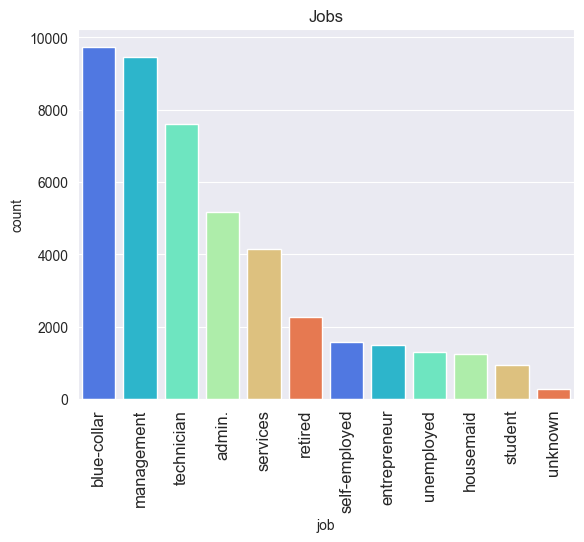

In [180]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=bank_orig_data, palette = palette_color, order=bank_orig_data['job'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

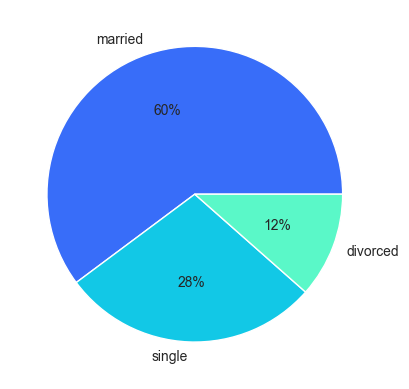

In [181]:
# Display state data in a form of Pie Graph
values = bank_orig_data['marital'].value_counts().keys().tolist()
counts = bank_orig_data['marital'].value_counts().tolist()
plt.pie(bank_orig_data['marital'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.show()

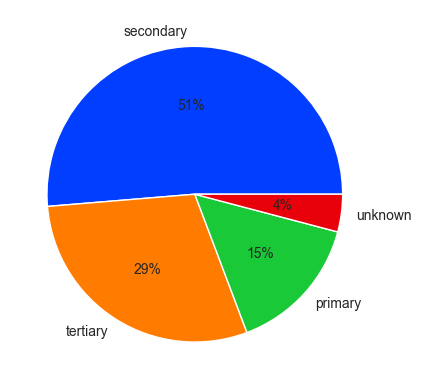

In [182]:
palette_b = sns.color_palette('bright')
# Display state data in a form of Pie Graph
values = bank_orig_data['education'].value_counts().keys().tolist()
counts = bank_orig_data['education'].value_counts().tolist()
plt.pie(bank_orig_data['education'].value_counts(), labels=values, colors=palette_b, autopct='%.0f%%')
plt.show()

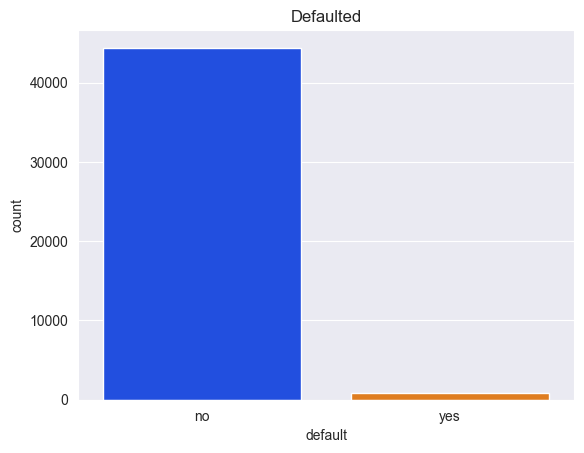

In [183]:
palette_b = sns.color_palette('bright')
sns.countplot(x='default', data=bank_orig_data, palette=palette_b, order=bank_orig_data['default'].value_counts().index)
plt.title('Defaulted')
plt.show()

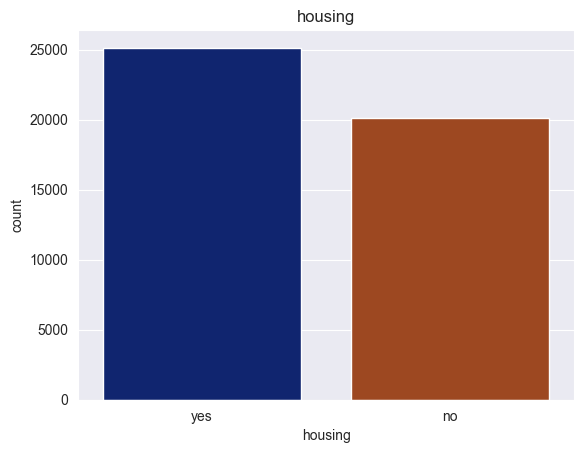

In [184]:
palette_d = sns.color_palette('dark')

sns.countplot(x='housing', data=bank_orig_data, palette = palette_d, order=bank_orig_data['housing'].value_counts().index)
plt.title('housing')
plt.show()

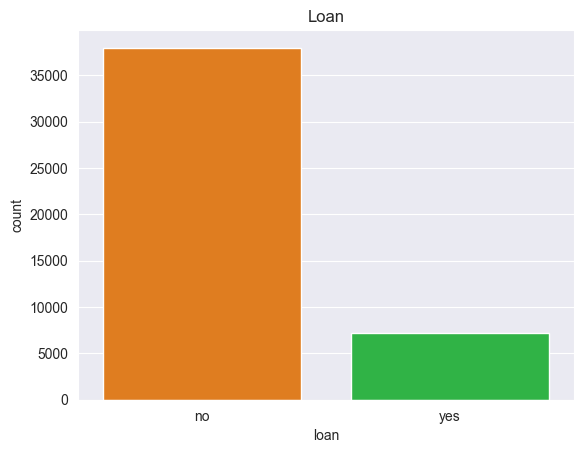

In [185]:
palette_temp = sns.color_palette('bright')[1:5]
sns.countplot(x='loan', data=bank_orig_data, palette = palette_temp, order=bank_orig_data['loan'].value_counts().index)
plt.title('Loan')
plt.show()

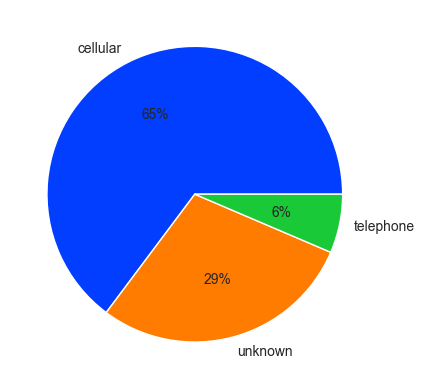

In [186]:
palette_b = sns.color_palette('bright')
# Display state data in a form of Pie Graph
values = bank_orig_data['contact'].value_counts().keys().tolist()
counts = bank_orig_data['contact'].value_counts().tolist()
plt.pie(bank_orig_data['contact'].value_counts(), labels=values, colors=palette_b, autopct='%.0f%%')
plt.show()

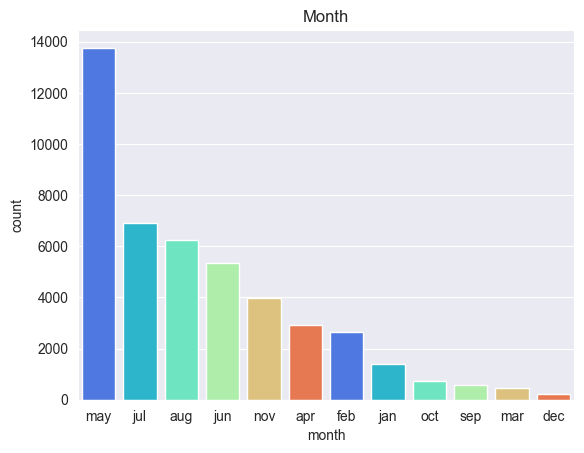

In [187]:
sns.countplot(x='month', data=bank_orig_data, palette = palette_color, order=bank_orig_data['month'].value_counts().index)
plt.title('Month')
plt.show()

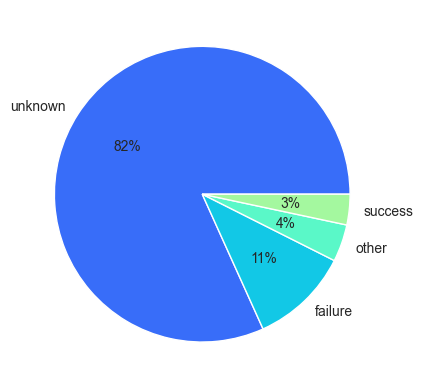

In [188]:
# Display state data in a form of Pie Graph
values = bank_orig_data['poutcome'].value_counts().keys().tolist()
counts = bank_orig_data['poutcome'].value_counts().tolist()
plt.pie(bank_orig_data['poutcome'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.show()

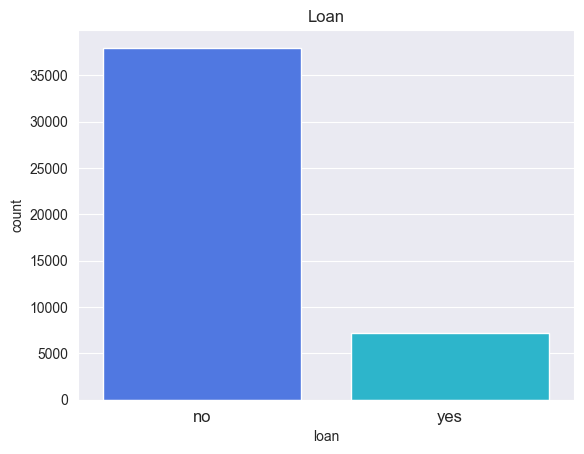

In [189]:
sns.countplot(x='loan', data=bank_orig_data, palette = palette_color, order=bank_orig_data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')
plt.show()

#### *Segregating the columns into Numeric and Non-Numeric* ####

In [190]:
# List of Numeric columns
numeric_cols=[columns for columns in bank_orig_data.columns if bank_orig_data[columns].dtypes == 'int64']      # We have observed earlier the numeric columns are 'int64'

# List of Non-Numeric or Categorical columns
categorical_cols=[columns for columns in bank_orig_data.columns if bank_orig_data[columns].dtypes == 'object']  # columns with 'object' data type are strings

In [191]:
cat_cols = []
num_cols = []
for columns in bank_orig_data.columns:
      if bank_orig_data[columns].dtypes == 'object':
            cat_cols.append(columns)
            print(f"There are {len(bank_orig_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif bank_orig_data[columns].dtypes == 'int64':
            num_cols.append(columns)

print("\nThe categorical columns are: ",cat_cols,"\n")
print("The numeric columns are: ",num_cols,"\n")

There are 12 unique values in the categorical column name 'job'
There are 3 unique values in the categorical column name 'marital'
There are 4 unique values in the categorical column name 'education'
There are 2 unique values in the categorical column name 'default'
There are 2 unique values in the categorical column name 'housing'
There are 2 unique values in the categorical column name 'loan'
There are 3 unique values in the categorical column name 'contact'
There are 12 unique values in the categorical column name 'month'
There are 4 unique values in the categorical column name 'poutcome'
There are 2 unique values in the categorical column name 'y'

The categorical columns are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 

The numeric columns are:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 



In [192]:
# Decide which categorical variables you want to use in model
for columns in bank_orig_data.columns:
    if bank_orig_data[columns].dtypes == 'object':
        unique_count = len(bank_orig_data[columns].unique())
        print("\n------------------------------------------\n")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n", bank_orig_data[columns].value_counts(),"\n")
        


------------------------------------------

There are 12 unique columns in the column name 'job'

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 


------------------------------------------

There are 3 unique columns in the column name 'marital'

 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 


------------------------------------------

There are 4 unique columns in the column name 'education'

 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64 


------------------------------------------

There are 2 unique columns in the column name 'default'

 default
no     44396
yes      815
Name: count, dtype: int64 


--------------------------

In [193]:
bank_orig_data[numeric_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [194]:
bank_orig_data[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### **Correlation Matrix**
Check for Assumption: Independent variables are independent of each other


In [195]:
bank_orig_data[numeric_cols].corr()

# Based on the Correlation Matrix, we don't see any major correlation between any of the independent numerical variables.
# In other words, we don't see the issue with collinearity problem.

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### *Scatterplot between variables along with histograms*
Check for Assumption: Independent variables are independent of each other

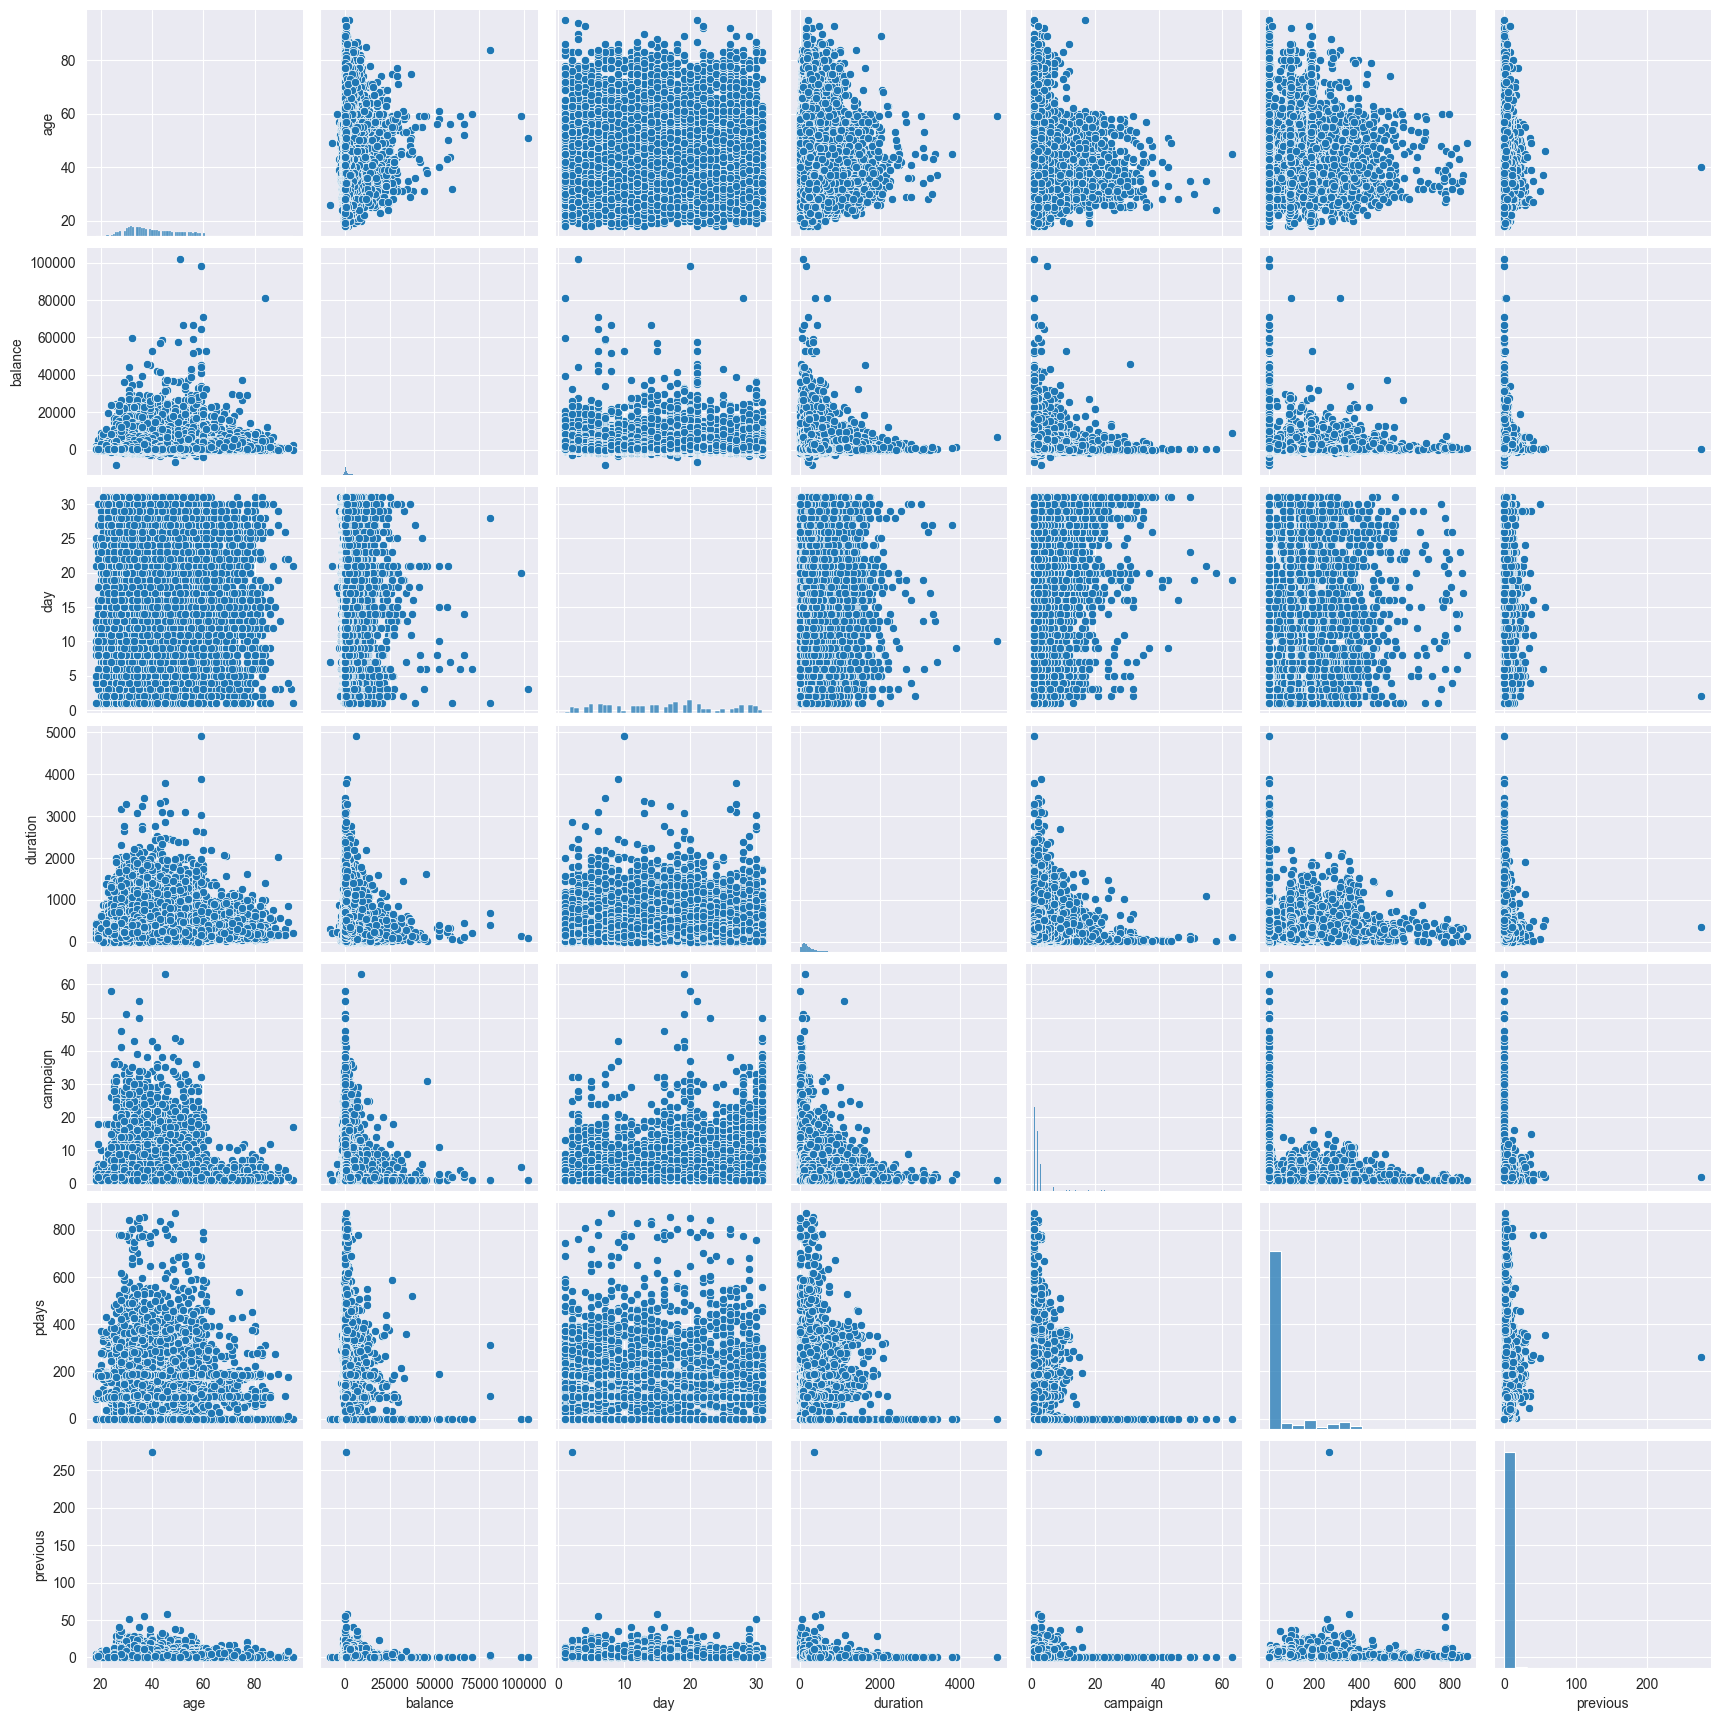

In [196]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(bank_orig_data[numeric_cols])

<Axes: xlabel='y', ylabel='job'>

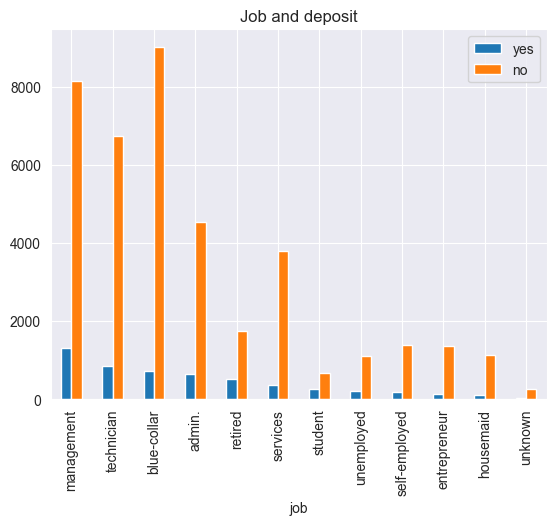

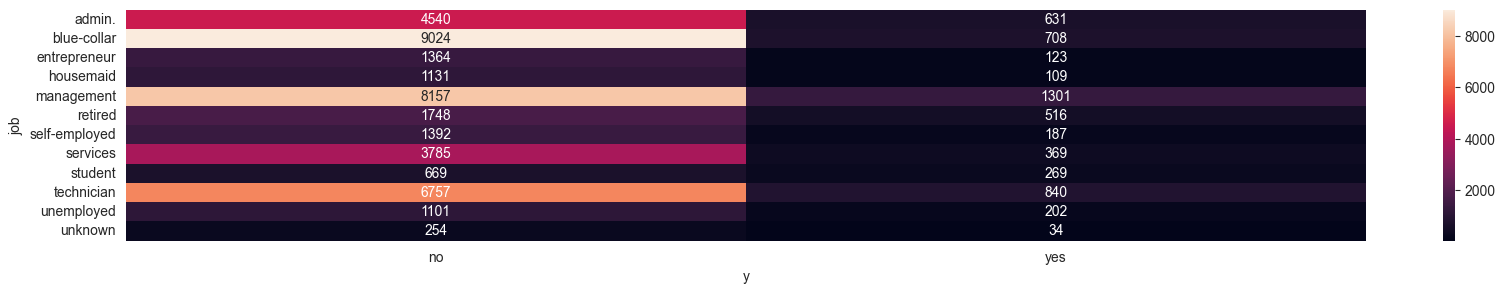

In [197]:
# Correlation between Marital Status and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['job'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['job'].value_counts()
df_ld.plot.bar(title = 'Job and deposit')

fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['job'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='marital'>

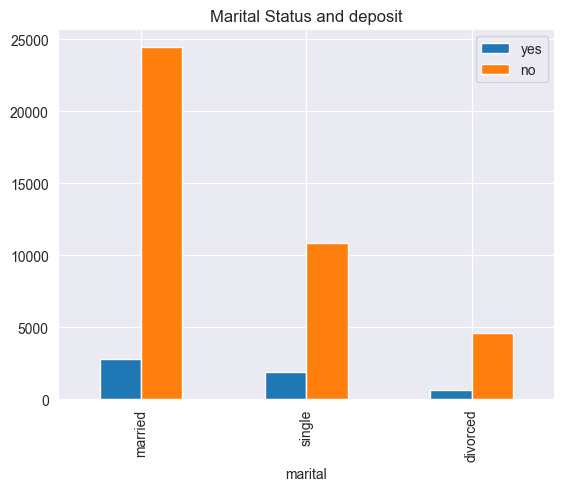

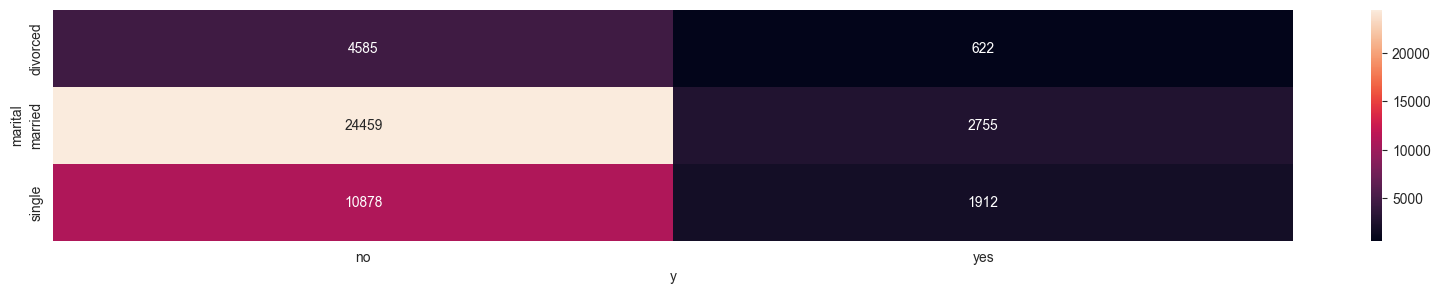

In [198]:
# Correlation between Marital Status and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['marital'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['marital'].value_counts()
df_ld.plot.bar(title = 'Marital Status and deposit')

fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['marital'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='education'>

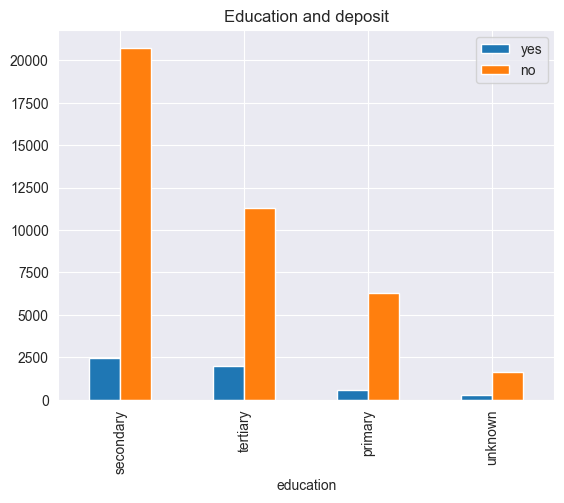

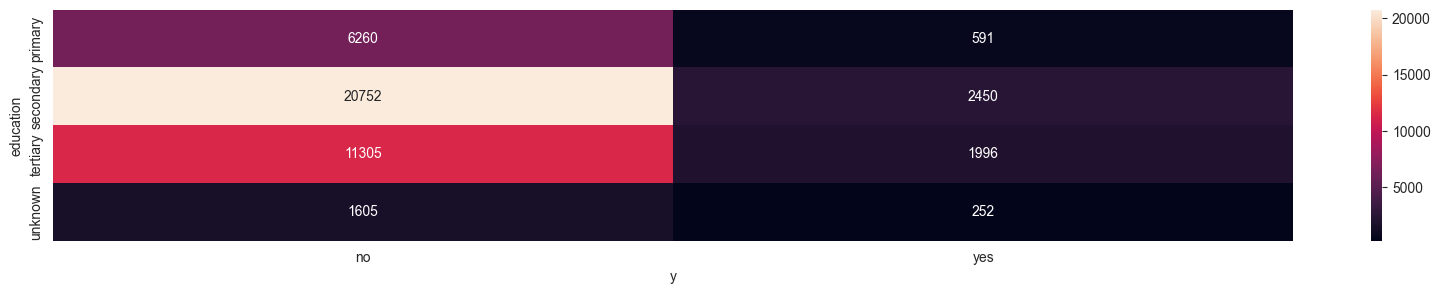

In [199]:
# Correlation between poutcome and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['education'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['education'].value_counts()
df_ld.plot.bar(title = 'Education and deposit')


fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['education'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='default'>

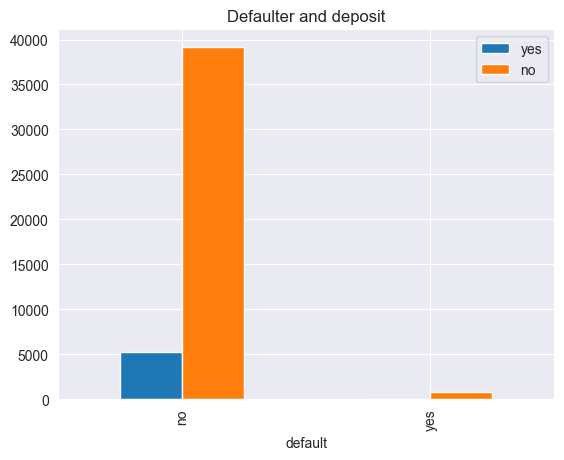

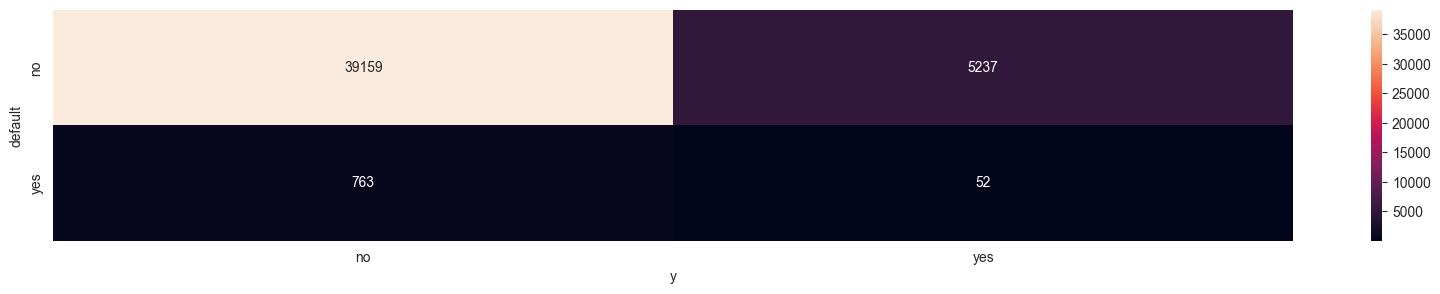

In [200]:
# Correlation between Marital Status and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['default'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['default'].value_counts()
df_ld.plot.bar(title = 'Defaulter and deposit')


fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['default'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='housing'>

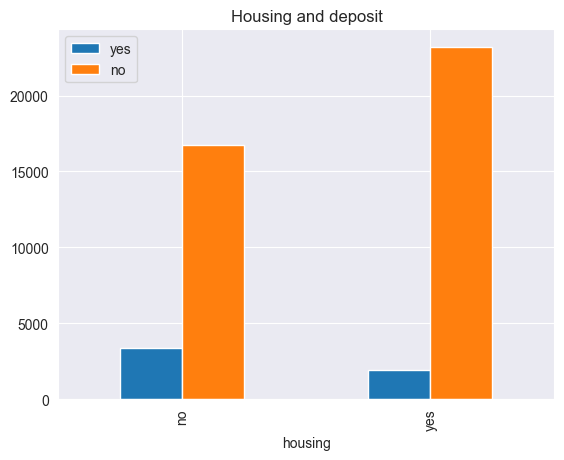

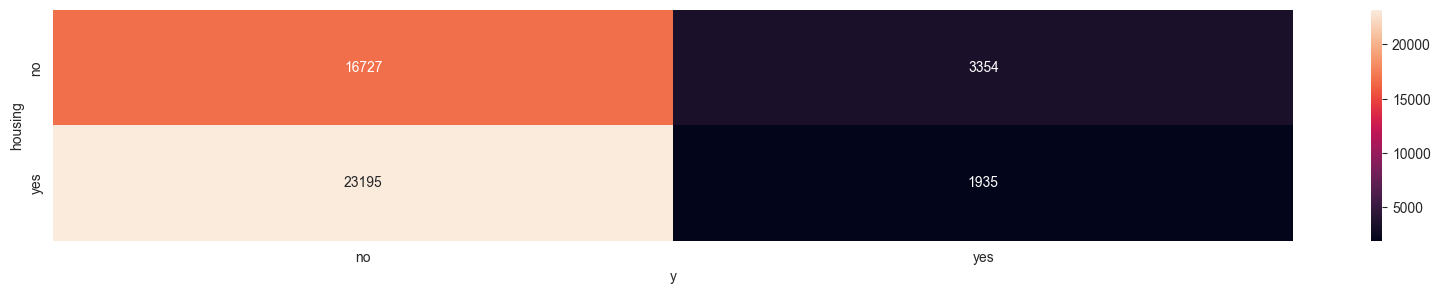

In [201]:
# Correlation between Marital Status and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['housing'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['housing'].value_counts()
df_ld.plot.bar(title = 'Housing and deposit')


fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['housing'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='loan'>

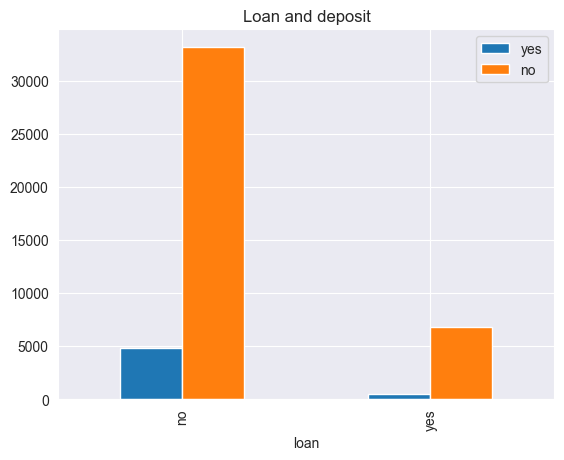

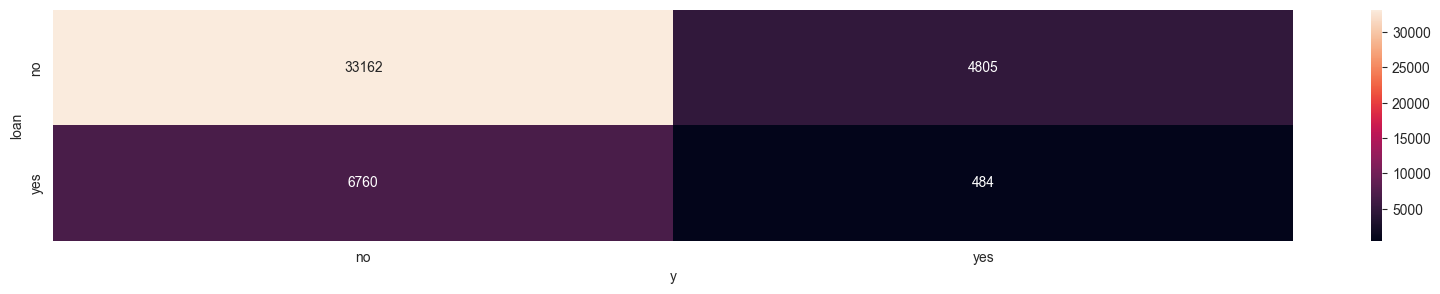

In [202]:
# Correlation between Loan and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['loan'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['loan'].value_counts()
df_ld.plot.bar(title = 'Loan and deposit')


fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['loan'], columns=bank_orig_data['y']), annot=True, fmt='g')

<Axes: xlabel='y', ylabel='poutcome'>

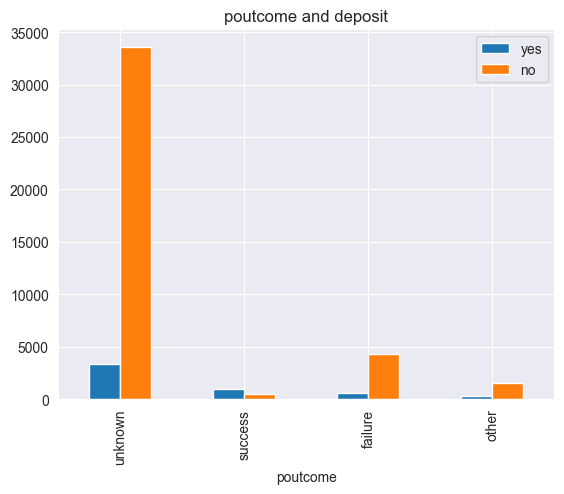

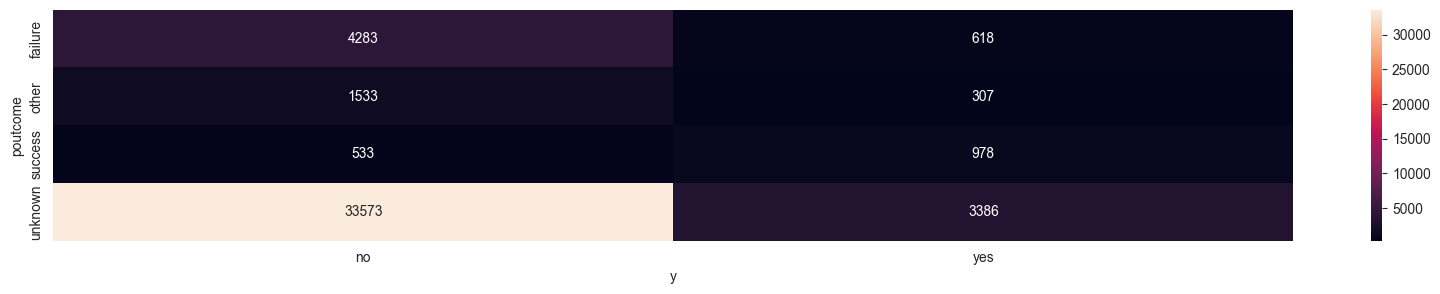

In [203]:
# Correlation between poutcome and Deposit

df_ld = pd.DataFrame()
df_ld['yes'] = bank_orig_data[bank_orig_data['y'] == 'yes']['poutcome'].value_counts()
df_ld['no'] = bank_orig_data[bank_orig_data['y'] == 'no']['poutcome'].value_counts()
df_ld.plot.bar(title = 'poutcome and deposit')


fig= plt.figure(figsize=(20, 3))
sns.heatmap(pd.crosstab(index=bank_orig_data['poutcome'], columns=bank_orig_data['y']), annot=True, fmt='g')

#### **Transforming data** ####

In [204]:
bank_data = bank_orig_data.copy(deep=True)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### *Checking Unknown entries in columns - 'job', 'education', 'contact', 'poutcome'* ####

In [205]:
# Replacing 'unknown' to 'other' in columns 'job','education','contact','poutcome'
for columns in bank_data.columns:
       if (columns in bank_data[['job','education','contact','poutcome']]):
             unknown_count = bank_data[columns].value_counts()['unknown']
             print(f'There are {unknown_count} unknown values in the column {columns}')

There are 288 unknown values in the column job
There are 1857 unknown values in the column education
There are 13020 unknown values in the column contact
There are 36959 unknown values in the column poutcome


In [206]:
bank_data.job.value_counts().keys

<bound method Series.keys of job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64>

In [207]:
# Checking unknown entries in the column 'job'

print(bank_data.job.value_counts(),"\n")
# There are 288 entries as unknown

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 



In [208]:
# Checking unknown entries in the column 'education'

print(bank_data.education.value_counts(),"\n")
# There are 1857 entries as unknown

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64 



In [209]:
# Checking unknown entries in the column 'contact'

print(bank_data.contact.value_counts(),"\n")
# There are 13020 entries as unknown

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64 



In [210]:
# Checking unknown entries in the column 'poutcome'

print(bank_data.poutcome.value_counts(),"\n")
# There are 36959 entries as unknown

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64 



#### *Replacing Unknown with 'other'* ####

In [211]:
# Replacing 'unknown' in job, education, contact and poutcome
bank_data[['job','education','contact','poutcome']] = bank_data[['job','education','contact','poutcome']].replace(['unknown'],'other')

bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,other,no
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,other,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,other,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,other,no


In [212]:
# Replacing 'unknown' to 'other' in columns 'job','education','contact','poutcome'
for columns in bank_data.columns:
       if (columns in bank_data[['job','education','contact','poutcome']]):
            other_count = bank_data[columns].value_counts()['other']
            print(f'There are {other_count} unknown values in the column \'{columns}\'')

There are 288 unknown values in the column 'job'
There are 1857 unknown values in the column 'education'
There are 13020 unknown values in the column 'contact'
There are 38799 unknown values in the column 'poutcome'


#### *Replacing 'yes' and 'no' with 1 and 0 respectively for columns 'default', 'housing', 'loan', 'y'* ####

In [213]:
for columns in bank_data.columns:
      if (columns in bank_data[['default','housing','loan','y']]):
            if bank_data[columns].dtypes == 'object':
                 bank_data[columns] = bank_data[columns].str.lower().replace({'yes': 1, 'no': 0})

In [214]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


## **Converting Categorical Values in Columns to Numeric using get_dummies method** ##

In [215]:
dummy_data = bank_data.copy(deep=True)
dummy_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


In [216]:
categorical = dummy_data.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [217]:
# Getting numeric values for the categorical columns
cat_cols_df = pd.get_dummies(categorical, dtype=np.int64)
cat_cols_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [218]:
cat_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           45211 non-null  int64
 1   job_blue-collar      45211 non-null  int64
 2   job_entrepreneur     45211 non-null  int64
 3   job_housemaid        45211 non-null  int64
 4   job_management       45211 non-null  int64
 5   job_other            45211 non-null  int64
 6   job_retired          45211 non-null  int64
 7   job_self-employed    45211 non-null  int64
 8   job_services         45211 non-null  int64
 9   job_student          45211 non-null  int64
 10  job_technician       45211 non-null  int64
 11  job_unemployed       45211 non-null  int64
 12  marital_divorced     45211 non-null  int64
 13  marital_married      45211 non-null  int64
 14  marital_single       45211 non-null  int64
 15  education_other      45211 non-null  int64
 16  education_primary    4

In [219]:
# Adding the newly created DataFrame 'cat_cols_df' to the existent 'bank_data' DataFrame using concatination
# The duplicate categorical columns that were existent 'bank_data' DataFrame, will need to be removed
dummy_data = pd.concat([dummy_data,cat_cols_df],axis=1)
dummy_data.drop(columns=categorical.columns,axis=1,inplace=True)

In [220]:
dummy_data.info() # Now all columns are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  int64
 12  job_blue-collar      45211 non-null  int64
 13  job_entrepreneur     45211 non-null  int64
 14  job_housemaid        45211 non-null  int64
 15  job_management       45211 non-null  int64
 16  job_other            4

In [221]:
dummy_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,1,0


### **Creating the Model using Dummy Data** ###

In [222]:
# Dividing our data into input and output variables
x=pd.concat([dummy_data.iloc[:,0:10],dummy_data.iloc[:,11:]],axis=1)
y=dummy_data.iloc[:,10]

In [223]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  job_admin.           45211 non-null  int64
 11  job_blue-collar      45211 non-null  int64
 12  job_entrepreneur     45211 non-null  int64
 13  job_housemaid        45211 non-null  int64
 14  job_management       45211 non-null  int64
 15  job_other            45211 non-null  int64
 16  job_retired          4

In [224]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [225]:
# Logistic regression and fit the model
classifier = LogisticRegression() # Initialize the model i.e. called instance
# First create object 'classifier' for class LogisticRegression
classifier.fit(x,y) # Then use this object to fit the model. Thisis the std method

LogisticRegression()

In [226]:
# Predict for X dataset
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [227]:
prediction_df = pd.DataFrame({'actual':y, 'predicted': y_pred})

In [228]:
prediction_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [229]:
# Confusion Matrix for the model accuracy TP  FP
#                                         FN  TN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

conf_matrix = confusion_matrix(y,y_pred)
accuracies = cross_val_score(estimator = classifier, X = x, y = y, cv = 10)

print('The Confusion Matrix is -\n',conf_matrix,'\n')
print("The Accuracy is:", accuracies.mean()*100,'\n')
print("The Standard Deviation is:", accuracies.std()*100,'\n')
print('The Classification Report is:\n', classification_report(y, y_pred),'\n')

The Confusion Matrix is -
 [[39116   806]
 [ 4045  1244]] 

The Accuracy is: 88.43640630910976 

The Standard Deviation is: 1.6953065033185548 

The Classification Report is:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.61      0.24      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211
 



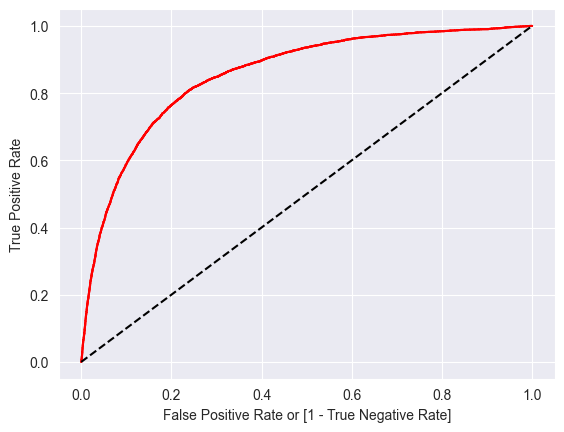

auc accuracy: 0.6075078867395127


In [230]:
from sklearn.metrics import roc_curve # roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

## **Manually Converting Categorical Values in Columns to Numeric** ##

#### *Replacing categorical values in the column 'job' to numeric values* ####

In [231]:
manual_data = bank_data.copy(deep=True)
manual_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


In [232]:
# Checking the column for 'job'
print(manual_data.job.value_counts(),"\n")
# There are 288 entries as unknown

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: count, dtype: int64 



In [233]:
# For education we are replacing 'blue-collar' to 1, 'management' to 2,'technician' to 3, 'admin.' to 4 and so on
manual_data = manual_data.replace({'job': {'blue-collar':1,'management':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11,'other':0}})
print(manual_data.job.value_counts(),"\n")

job
1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: count, dtype: int64 



#### *Replacing categorical values in the column 'marital' to numeric values* ####

In [234]:
# Checking the column for 'marital'
print(manual_data.marital.value_counts(),"\n")
# There are 288 entries as unknown

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 



In [235]:
# For marital column we are replacing 'married' to 1, 'single' to 2 and 'divorced' to 3
manual_data = manual_data.replace({'marital': {'married':1,'single':2,'divorced':3}})
print(manual_data.marital.value_counts(),"\n")

marital
1    27214
2    12790
3     5207
Name: count, dtype: int64 



#### *Replacing categorical values in the column 'education' to numeric values* ####

In [236]:
# Checking the column for 'education'
print(manual_data.education.value_counts(),"\n")
# There are 288 entries as unknown

education
secondary    23202
tertiary     13301
primary       6851
other         1857
Name: count, dtype: int64 



In [237]:
# For education we are replacing 'secondary' to 1, 'tertiary' to 2 and 'primary' to 1 and 'other' to 0
manual_data = manual_data.replace({'education': {'other':0, 'secondary':1,'tertiary':2,'primary':3}})
print(manual_data.education.value_counts(),"\n")

education
1    23202
2    13301
3     6851
0     1857
Name: count, dtype: int64 



#### *Replacing categorical values in the column 'contact' to numeric values* ####

In [238]:
# Checking the column for 'contact'
print(manual_data.contact.value_counts(),"\n")
# There are 288 entries as unknown

contact
cellular     29285
other        13020
telephone     2906
Name: count, dtype: int64 



In [239]:
# For column contact we are replacing 'other' to 0, 'cellular' to 1 and 'telephone' to 1
manual_data = manual_data.replace({'contact': {'cellular':1,'other':0,'telephone':2}})
print(manual_data.contact.value_counts(),"\n")

contact
1    29285
0    13020
2     2906
Name: count, dtype: int64 



#### *Replacing categorical values in the column 'month' to numeric values* ####

In [240]:
# Checking the column for 'month'
print(manual_data.month.value_counts(),"\n")
# There are 288 entries as unknown

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64 



In [241]:
# Replacing 'jan' to 1,'feb'to 2,'mar' to 3,'apr' to 4,'may' to 5,'jun' to 6,'jul' to 7,'aug'to 8,'sep' to 9,'oct' to 10,'nov' to 11 and 'dec' to 12
manual_data = manual_data.replace({'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}})
print(manual_data.month.value_counts(),"\n")


month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64 



#### *Replacing categorical values in the column 'poutcome' to numeric values* ####

In [242]:
# Checking unknown entries in the column 'poutcome'
print(manual_data.poutcome.value_counts(),"\n")
# There are 288 entries as unknown

poutcome
other      38799
failure     4901
success     1511
Name: count, dtype: int64 



In [243]:
# For column contact we are replacing 'other' to 0, 'cellular' to 1 and 'telephone' to 1
manual_data = manual_data.replace({'poutcome': {'other':0,'failure':1,'success':2}})
print(manual_data.poutcome.value_counts(),"\n")

poutcome
0    38799
1     4901
2     1511
Name: count, dtype: int64 



In [244]:
manual_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,3,2,1,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,8,1,1,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,1,17,11,977,3,-1,0,0,1
45207,71,6,3,3,0,1729,0,0,1,17,11,456,2,-1,0,0,1
45208,72,6,1,1,0,5715,0,0,1,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,2,17,11,508,4,-1,0,0,0


In [245]:
manual_data.info() # All data is numeric now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


### **Creating the Model using Dummy Data** ###

In [246]:
# Dividing our data into input and output variables
x_m=manual_data.iloc[:,0:16]
y_m=manual_data.iloc[:,16]

In [247]:
x_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [248]:
y_m.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [249]:
# Logistic regression and fit the model
classifier_m = LogisticRegression() # Initialize the model i.e. called instance
# First create object 'classifier' for class LogisticRegression
classifier_m.fit(x_m,y_m) # Then use this object to fit the model. Thisis the std method

LogisticRegression()

In [250]:
# Predict for X dataset
y_m_pred = classifier_m.predict(x_m)
y_m_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [251]:
prediction_m_df = pd.DataFrame({'actual':y_m, 'predicted': y_m_pred})
prediction_m_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [252]:
# Confusion Matrix for the model accuracy TP  FP
#                                         FN  TN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

conf_m_matrix = confusion_matrix(y_m,y_m_pred)
accuracies_m = cross_val_score(estimator = classifier_m, X = x_m, y = y_m, cv = 10)

print('The Confusion Matrix is -\n',conf_m_matrix,'\n')
print("The Accuracy is:", accuracies_m.mean()*100,'\n')
print("The Standard Deviation is:", accuracies_m.std()*100,'\n')
print('The Classification Report is:\n', classification_report(y_m, y_m_pred),'\n')

The Confusion Matrix is -
 [[39163   759]
 [ 4271  1018]] 

The Accuracy is: 88.12229791857371 

The Standard Deviation is: 2.0548885899601497 

The Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211
 



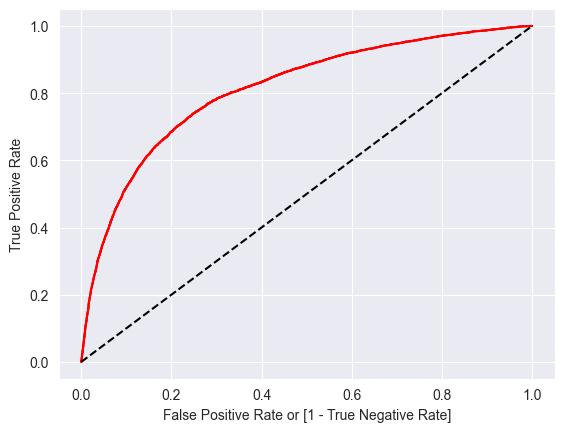

auc accuracy: 0.5867314372309422


In [253]:
from sklearn.metrics import roc_curve # roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

# ROC Curve plotting and finding AUC value
fpr_m,tpr_m,thresholds_m=roc_curve(y_m,classifier_m.predict_proba(x_m)[:,1])
plt.plot(fpr_m,tpr_m,color='red')
auc_m=roc_auc_score(y_m,y_m_pred)

plt.plot(fpr_m,tpr_m,color='red',label='logit model(area  = %0.2f)'%auc_m)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc_m)

    The Model created using get_dummies shows better accuracy than the Manually Created Model